In [1]:
import pandas as pd

In [2]:
dir = "/Users/juantollo/Documents/Tesis/experimentos/output/microsoft/phi-2/hellaswag/16/4/5000/1e-5"ArithmeticError
["test","train","val"]
test_all_targets.npy



SyntaxError: invalid syntax (3364846728.py, line 1)

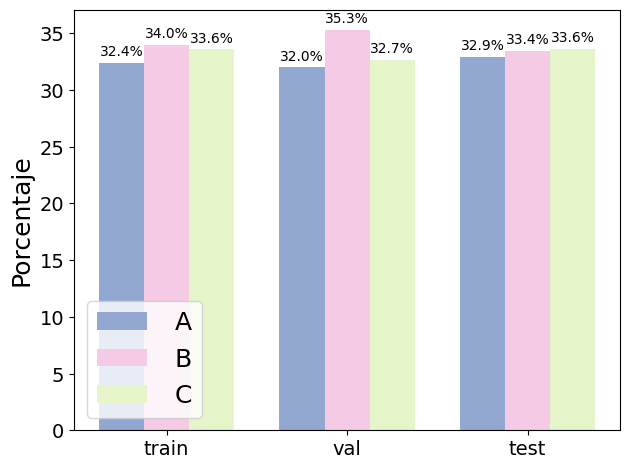

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import PreTrainedTokenizerFast

def plot_combined_label_distribution(directory, dataset_name):
    # Load the tokenizer
    tokenizer_path = f"{directory}/tokenizer/tokenizer.json"
    tokenizer = PreTrainedTokenizerFast(tokenizer_file=tokenizer_path)

    sets = ['train', 'val', 'test']
    data = {}
    
    # Load and decode labels for each set
    for set_name in sets:
        file_path = f"{directory}/{set_name}_all_targets.npy"
        labels_array = np.load(file_path)
        labels = tokenizer.batch_decode(labels_array, skip_special_tokens=True)
        unique_labels, counts = np.unique(labels, return_counts=True)
        data[set_name] = (unique_labels, counts)

    # Ensure all sets have the same labels for consistent plotting
    all_labels = set(label for labels, _ in data.values() for label in labels)
    labels_list = sorted(all_labels)  # Sort labels for consistent plotting

    # Convert counts to percentages and prepare for plotting
    totals = {set_name: sum(counts) for set_name, (_, counts) in data.items()}
    percentages = {set_name: [100 * counts[list(labels).index(label)] / totals[set_name] if label in labels else 0
                               for label in labels_list] 
                   for set_name, (labels, counts) in data.items()}
    
    # Plotting
    x = np.arange(len(sets))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots()
    colors = ['#92a8d1', '#f4cae4', '#e6f5c9']  # Pastel blue, pink, and green

    # Plot each label as a separate bar within each set group
    rect_groups = []
    for i, label in enumerate(labels_list):
        label_percentages = [percentages[set_name][i] for set_name in sets]
        rects = ax.bar(x + i * width, label_percentages, width, label=label, color=colors[i % len(colors)])
        rect_groups.append(rects)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Porcentaje', fontsize=18)
    #ax.set_title(f'Label Distribution by Percentage in {dataset_name}')
    ax.set_xticks(x + width)
    ax.set_xticklabels(sets)
    ax.legend(fontsize=18)
    ax.tick_params(axis='both', labelsize=14)  # Cambia '10' al tamaño deseado

    for rects in rect_groups:
        ax.bar_label(rects, padding=3, fmt='%.1f%%', color='black')

    fig.tight_layout()
    plt.savefig('./plots/socialiqa_label_distribution.png')
    plt.show()

# Path to the SocialIQA dataset
socialiqa_dir = "/Users/juantollo/Documents/Tesis/experimentos/output/microsoft/phi-1.5/socialiqa/8/4/5000/1e-5"

plot_combined_label_distribution(socialiqa_dir, "SocialIQA")

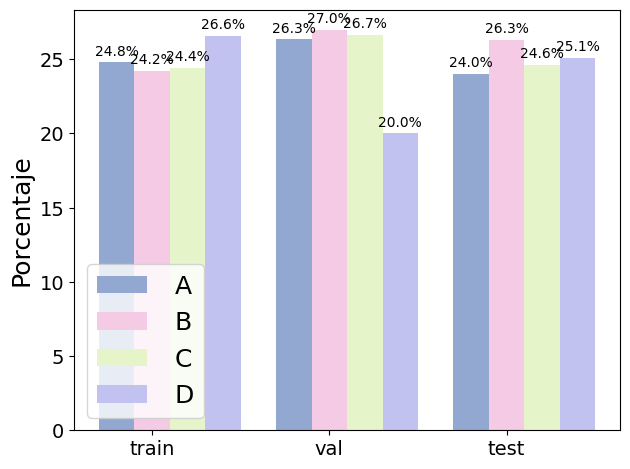

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import PreTrainedTokenizerFast

def plot_combined_label_distribution(directory, dataset_name):
    # Load the tokenizer
    tokenizer_path = f"{directory}/tokenizer/tokenizer.json"
    tokenizer = PreTrainedTokenizerFast(tokenizer_file=tokenizer_path)

    sets = ['train', 'val', 'test']
    data = {}
    
    # Load and decode labels for each set
    for set_name in sets:
        file_path = f"{directory}/{set_name}_all_targets.npy"
        labels_array = np.load(file_path)
        labels = tokenizer.batch_decode(labels_array, skip_special_tokens=True)
        unique_labels, counts = np.unique(labels, return_counts=True)
        data[set_name] = (unique_labels, counts)

    # Ensure all sets have the same labels for consistent plotting
    all_labels = set(label for labels, _ in data.values() for label in labels)
    labels_list = sorted(all_labels)  # Sort labels for consistent plotting

    # Convert counts to percentages and prepare for plotting
    totals = {set_name: sum(counts) for set_name, (_, counts) in data.items()}
    percentages = {set_name: [100 * counts[list(labels).index(label)] / totals[set_name] if label in labels else 0
                               for label in labels_list] 
                   for set_name, (labels, counts) in data.items()}
    
    # Plotting
    x = np.arange(len(sets))  # the label locations
    width = 0.20  # the width of the bars

    fig, ax = plt.subplots()
    colors = ['#92a8d1', '#f4cae4', '#e6f5c9', '#c2c2f0']  # Pastel blue, pink, and green

    # Plot each label as a separate bar within each set group
    rect_groups = []
    for i, label in enumerate(labels_list):
        label_percentages = [percentages[set_name][i] for set_name in sets]
        rects = ax.bar(x + i * width, label_percentages, width, label=label, color=colors[i % len(colors)])
        rect_groups.append(rects)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Porcentaje', fontsize=18)
    #ax.set_title(f'Label Distribution by Percentage in {dataset_name}')
    ax.set_xticks(x + width)
    ax.set_xticklabels(sets)
    ax.legend(fontsize=18)
    ax.tick_params(axis='both', labelsize=14)  # Cambia '10' al tamaño deseado

    for rects in rect_groups:
        ax.bar_label(rects, padding=3, fmt='%.1f%%', color='black')

    
    fig.tight_layout()
    plt.savefig('./plots/hellaswag_label_distribution.png')
    plt.show()

# Path to the SocialIQA dataset

hellaswag_dir = "/Users/juantollo/Documents/Tesis/experimentos/output/microsoft/phi-1.5/hellaswag/8/5/5000/1e-4"

plot_combined_label_distribution(hellaswag_dir, "HellaSwag")

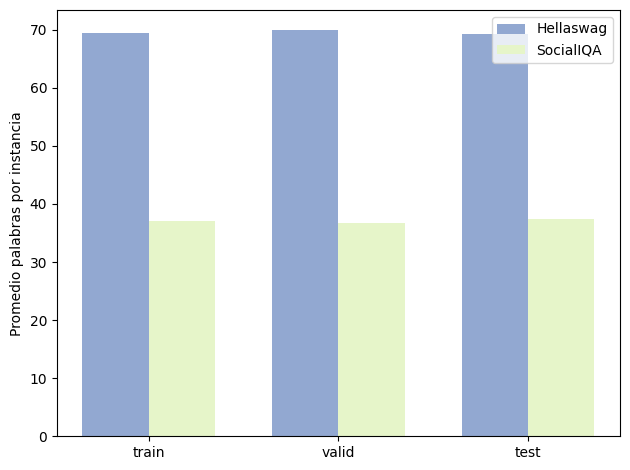

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_average_words(file_path):
    word_counts = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            text = data['text']  # Asumiendo que el texto está bajo la clave 'text'
            word_counts.append(len(text.split()))
    return np.mean(word_counts)

def plot_average_words(directories, dataset_names):
    sets = ['train', 'valid', 'test']
    averages = {dataset: [] for dataset in dataset_names}

    for dataset, directory in zip(dataset_names, directories):
        for set_name in sets:
            file_path = f"{directory}/{set_name}.jsonl"
            avg_words = calculate_average_words(file_path)
            averages[dataset].append(avg_words)

    # Definir colores pasteles
    pastel_colors = ['#92a8d1', '#e6f5c9', '#fddad8', '#ffefd3']  # Añadir más si es necesario

    # Plotting
    x = np.arange(len(sets))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    for i, (dataset, avgs) in enumerate(averages.items()):
        # Aplicar colores pasteles
        ax.bar(x + i * width, avgs, width, label=dataset, color=pastel_colors[i % len(pastel_colors)])

    ax.set_ylabel('Promedio palabras por instancia')
    ax.set_xticks(x + width / 2 * (len(dataset_names) - 1))
    ax.set_xticklabels(sets)
    ax.legend()

    fig.tight_layout()
    #plt.savefig('./plots/average_words_distribution.png')
    plt.show()

# Paths to the datasets
directories = [
    "../data/processed/hellaswag",
    "../data/processed/socialiqa"
]
dataset_names = ["Hellaswag", "SocialIQA"]

plot_average_words(directories, dataset_names)

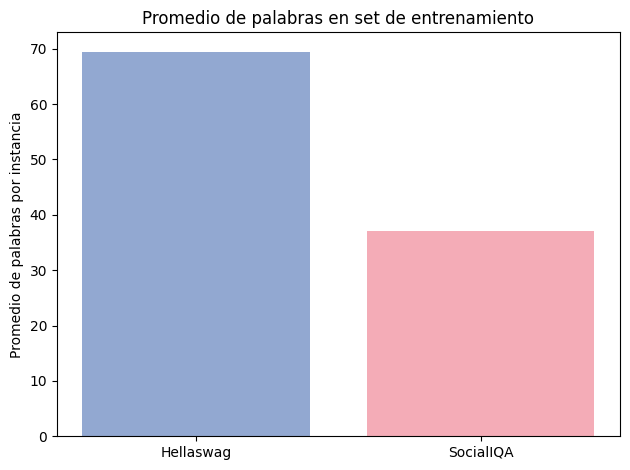

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_average_words(file_path):
    word_counts = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            text = data['text']  # Asumiendo que el texto está bajo la clave 'text'
            word_counts.append(len(text.split()))
    return np.mean(word_counts)

def plot_average_words(directories, dataset_names):
    averages = []
    
    for dataset, directory in zip(dataset_names, directories):
        file_path = f"{directory}/train.jsonl"  # Solo el set de entrenamiento
        avg_words = calculate_average_words(file_path)
        averages.append(avg_words)

    # Definir colores pasteles
    pastel_colors = ['#92a8d1', '#f4acb7']  # Colores pasteles para Hellaswag y SocialIQA

    # Plotting
    fig, ax = plt.subplots()
    ax.bar(dataset_names, averages, color=pastel_colors)

    ax.set_ylabel('Promedio de palabras por instancia')
    ax.set_title('Promedio de palabras en set de entrenamiento')
    
    fig.tight_layout()
    plt.savefig('./plots/average_words_distribution_train_only.png')
    plt.show()

# Paths to the datasets
directories = [
    "../data/processed/hellaswag",
    "../data/processed/socialiqa"
]
dataset_names = ["Hellaswag", "SocialIQA"]

plot_average_words(directories, dataset_names)

<Figure size 640x480 with 0 Axes>

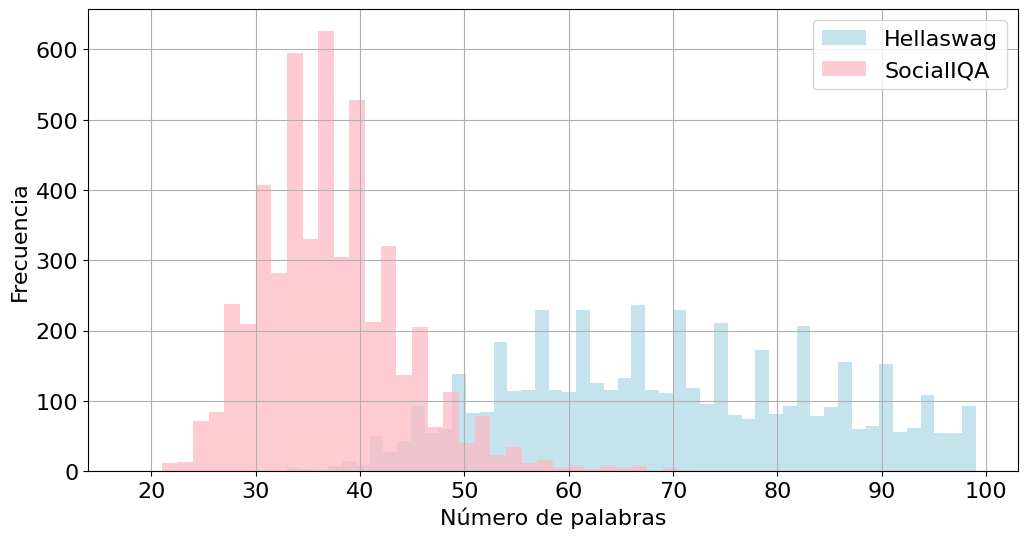

In [2]:
import json
import matplotlib.pyplot as plt

def count_words_in_jsonl(file_path):
    word_counts = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            text = data['text']  # Asumiendo que el texto está bajo la clave 'text'
            word_counts.append(len(text.split()))
    return word_counts

def plot_word_distributions(counts1, counts2, labels):
    plt.figure(figsize=(12, 6))
    plt.hist(counts1, bins=50, alpha=0.7, label=f'{labels[0]}', color='lightblue')
    plt.hist(counts2, bins=50, alpha=0.7, label=f'{labels[1]}', color='lightpink')
    plt.xlabel('Número de palabras')
    plt.ylabel('Frecuencia')
    #plt.title('Distribución de palabras en datasets')
    plt.legend()
    plt.grid(True)
    plt.savefig('./plots/word_distributions.png')
    plt.show()

# Rutas a los archivos
path1 = '/Users/juantollo/Documents/Tesis/data/processed/hellaswag/train.jsonl'
path2 = '/Users/juantollo/Documents/Tesis/data/processed/socialiqa/train.jsonl'

# Obtener conteos de palabras
word_counts1 = count_words_in_jsonl(path1)
word_counts2 = count_words_in_jsonl(path2)
plt.savefig('./plots/average_words_distribution.png')
plt.rcParams.update({'font.size': 16})  # Aumenta este valor para fuentes más grandes

# Graficar distribuciones
plot_word_distributions(word_counts1, word_counts2, ["Hellaswag", "SocialIQA"])

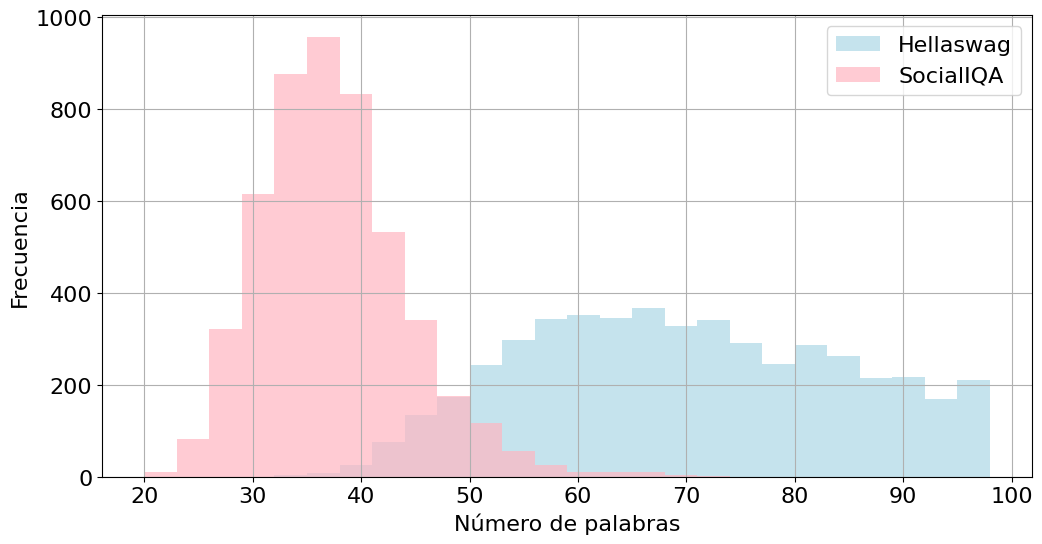

In [3]:
import numpy as np

def plot_word_distributions(counts1, counts2, labels):
    plt.figure(figsize=(12, 6))
    bins = np.arange(20, 101, 3)  # Bins from 20 to 100 with a step of 5
    plt.hist(counts1, bins=bins, alpha=0.7, label=f'{labels[0]}', color='lightblue')
    plt.hist(counts2, bins=bins, alpha=0.7, label=f'{labels[1]}', color='lightpink')
    plt.xlabel('Número de palabras')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.savefig('./plots/word_distributions.png')
    plt.show()
    plt.rcParams.update({'font.size': 14})  # Aumenta este valor para fuentes más grandes

# Use this updated function to plot your distributions again
plot_word_distributions(word_counts1, word_counts2, ["Hellaswag", "SocialIQA"])